# Discrete-Time Fourier Series

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

RANGE = 11

n = np.arange(RANGE)
impulse = np.zeros(RANGE)
impulse[0] = 1
zero_input = np.zeros(RANGE)

## Part A: DT Fourier Series

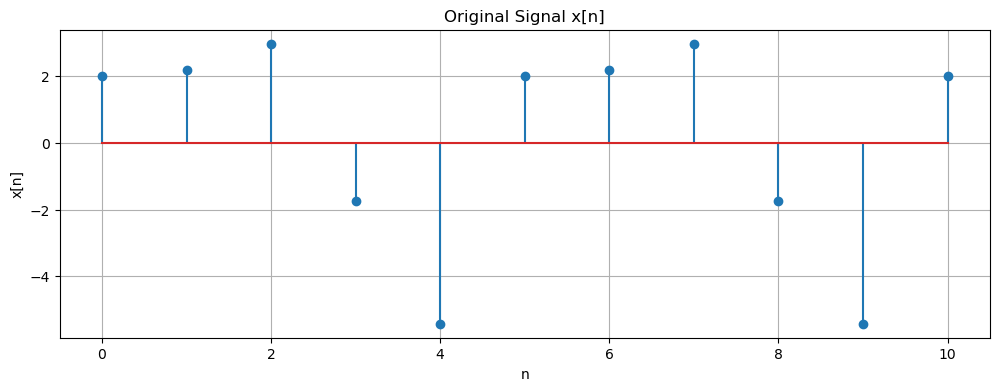

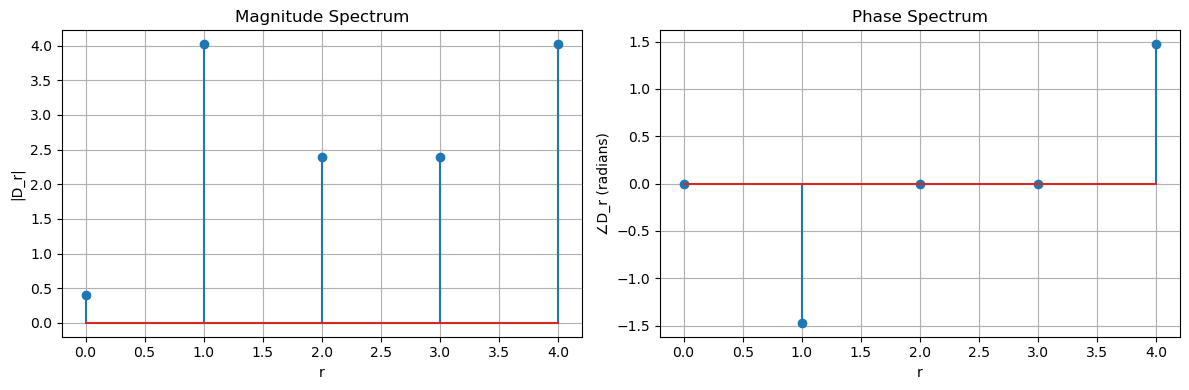

In [11]:
N_0 = 5
Omega_0 = 2*np.pi/N_0

n = np.arange(RANGE)
r_vals = np.arange(N_0)

x = 4*np.sin(2.4*np.pi*n) + 2*np.cos(3.2*np.pi*n)

D_r = np.zeros(N_0, dtype=complex)


for r in r_vals:
    D_r[r] = (1/N_0) * np.sum(x*np.exp(-1j*Omega_0*r*n))
    
mag_spect = np.abs(D_r)
phase_spect = np.angle(D_r)

# plot Original Signal
plt.figure(figsize=(12, 4))
plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Original Signal x[n]")
plt.grid()


# Mag and Phase Spectrums
plt.figure(figsize=(12, 4))
# Plot Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.stem(r_vals, mag_spect)
plt.xlabel("r")
plt.ylabel("|D_r|")
plt.title("Magnitude Spectrum")
plt.grid()

# Plot Phase Spectrum
plt.subplot(1, 2, 2)
plt.stem(r_vals, phase_spect)
plt.xlabel("r")
plt.ylabel("∠D_r (radians)")
plt.title("Phase Spectrum")
plt.grid()

plt.tight_layout()
plt.show()

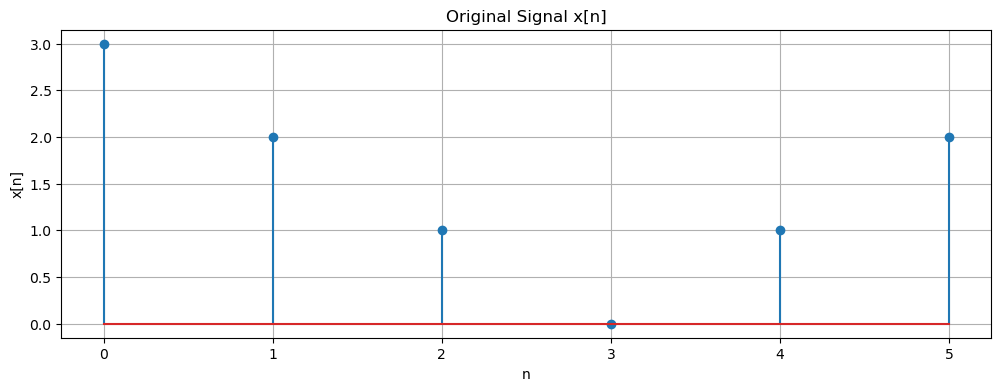

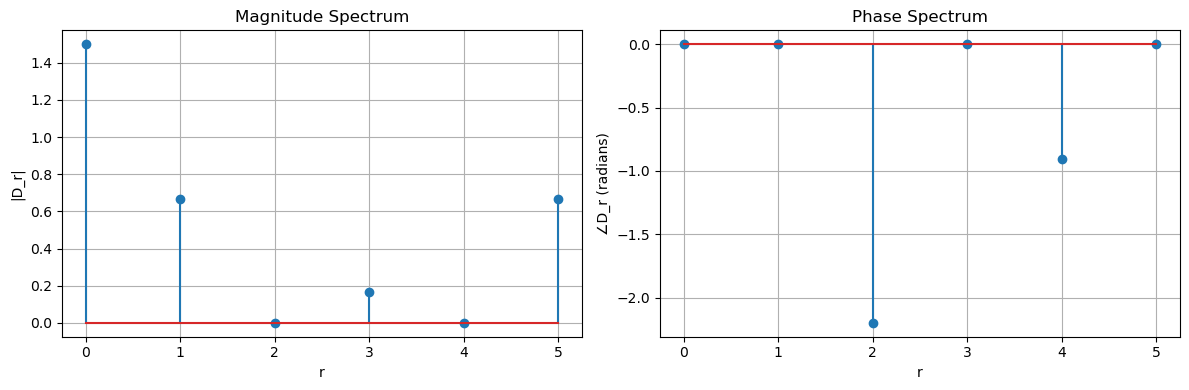

In [ ]:
## Part 3

N_0 = 6
Omega_0 = 2*np.pi/N_0

n = np.arange(N_0)
r_vals = np.arange(N_0)

x = np.array([3, 2, 1, 0, 1, 2])

D_r = np.zeros(N_0, dtype=complex)


for r in r_vals:
    D_r[r] = (1/N_0) * np.sum(x*np.exp(-1j*Omega_0*r*n))
    
mag_spect = np.abs(D_r)
phase_spect = np.angle(D_r)

# plot Original Signal
plt.figure(figsize=(12, 4))
plt.stem(n, x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Original Signal x[n]")
plt.grid()


# Mag and Phase Spectrums
plt.figure(figsize=(12, 4))

# Plot Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.stem(r_vals, mag_spect)
plt.xlabel("r")
plt.ylabel("|D_r|")
plt.title("Magnitude Spectrum")
plt.grid()

# Plot Phase Spectrum
plt.subplot(1, 2, 2)
plt.stem(r_vals, phase_spect)
plt.xlabel("r")
plt.ylabel("∠D_r (radians)")
plt.title("Phase Spectrum")
plt.grid()

plt.tight_layout()
plt.show()

## Part B: Inverse DTFS & Time Shifting Property

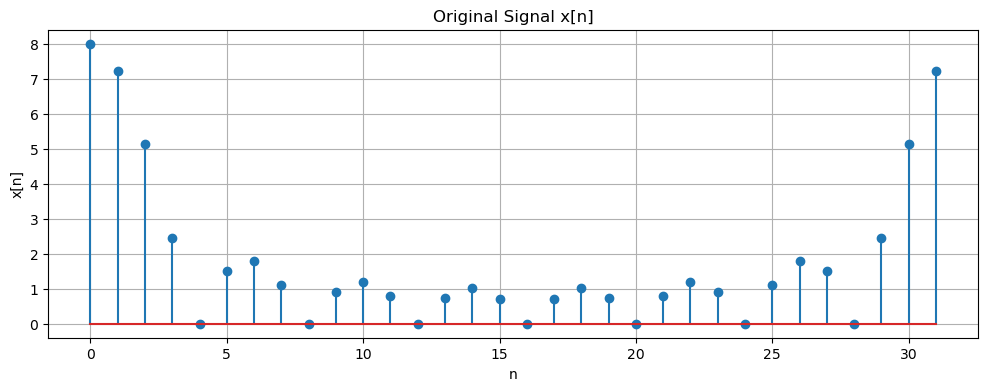

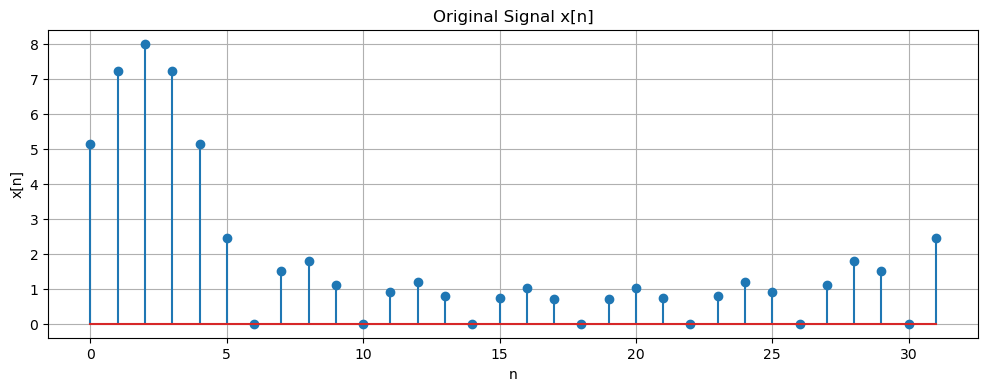

In [20]:
N_0 = 32
Omega_0 = 2*np.pi/N_0

n_vals = np.arange(N_0)
D_r = np.zeros(N_0)
D_r[0:4] = 1
D_r[28:32] = 1

D2_r = D_r*np.exp(-1j*(1+1)*Omega_0*n_vals) # 1+1 is the shift value (D = 1)

x1_n = np.zeros(N_0,  dtype=complex)
x2_n = np.zeros(N_0,  dtype=complex)


for n in n_vals:
    x1_n[n] = np.sum(D_r*np.exp(1j*Omega_0*n*n_vals))
    x2_n[n] = np.sum(D2_r*np.exp(1j*Omega_0*n*n_vals))
    
    

plt.figure(figsize=(12, 4))
plt.stem(n_vals, np.abs(x1_n))
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Original Signal x[n]")
plt.grid()
plt.show()


plt.figure(figsize=(12, 4))
plt.stem(n_vals, np.abs(x2_n))
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Original Signal x[n]")
plt.grid()
plt.show()


## Part C: System Response

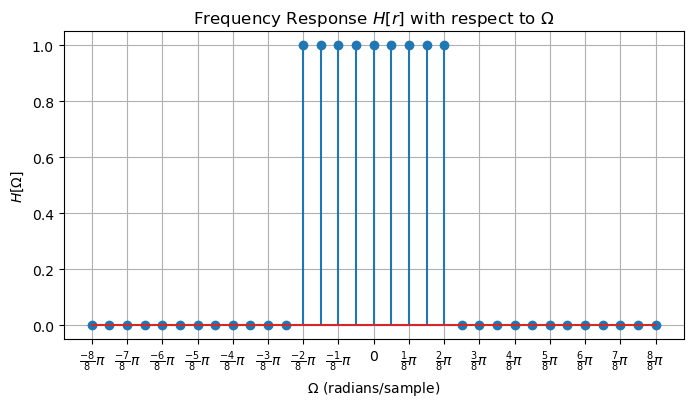

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
N0 = 32
r = np.arange(-16, 17)  # Range of frequency indices
Omega0 = (2 * np.pi) / N0  # Fundamental frequency
Omega = r * Omega0  # Convert r to Omega

# Define H[r] based on the given plot
H_r = np.zeros(len(r))  # Initialize H[r] as zeros
H_r[(r >= -4) & (r <= 4)] = 1  # Active in range -4 ≤ r ≤ 4

# Define custom x-axis ticks at π/8 increments (reduce clutter)
pi_fraction = np.pi / 8  # Change this to pi/4 for even fewer ticks
xtick_positions = np.arange(-np.pi, np.pi + pi_fraction, pi_fraction)  # Less dense ticks
xtick_labels = [rf'$\frac{{{int(k)}}}{{8}}\pi$' if k != 0 else '0' for k in np.round(xtick_positions / pi_fraction)]  

# Plot H[r] vs. Omega
plt.figure(figsize=(8, 4))
plt.stem(Omega, H_r)
plt.xlabel(r'$\Omega$ (radians/sample)')
plt.ylabel(r'$H[\Omega]$')
plt.title(r'Frequency Response $H[r]$ with respect to $\Omega$')

# Apply fewer x-axis ticks
plt.xticks(xtick_positions, xtick_labels)
plt.grid()
plt.show()


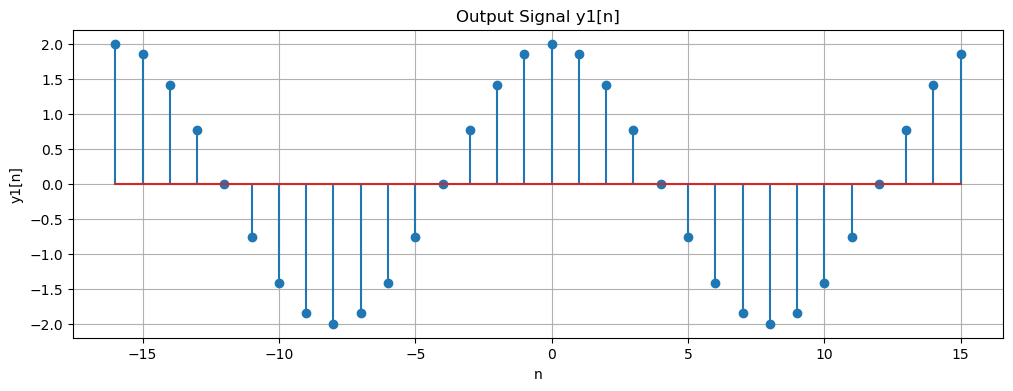

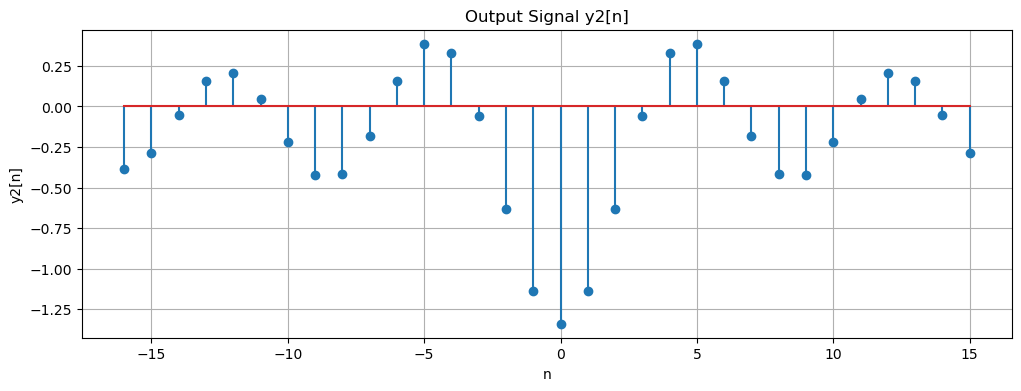

In [41]:
# Define fundamental parameters
N0 = 32  # Period
n = np.arange(-16, 16)  # Define time indices
r = np.arange(N0)  # Frequency indices

# Define input signals
x1 = 4 * np.cos((np.pi * n) / 8)
x2 = 4 * np.cos((np.pi * n) / 3)

# Initialize DTFS coefficients
D1_r = np.zeros(N0, dtype=complex)
D2_r = np.zeros(N0, dtype=complex)

# Compute DTFS coefficients
for k in range(N0):  # Iterate over frequency index
    D1_r[k] = (1 / N0) * np.sum(x1 * np.exp(-1j * 2 * np.pi * k * n / N0))
    D2_r[k] = (1 / N0) * np.sum(x2 * np.exp(-1j * 2 * np.pi * k * n / N0))

# Define H[r] based on the given plot
H_r = np.zeros(len(r))  # Initialize H[r] as zeros
H_r[(r >= -4) & (r <= 4)] = 1  # Active in range -4 ≤ r ≤ 4

# Apply frequency-domain filtering
Y1_r = D1_r * H_r
Y2_r = D2_r * H_r

# Initialize inverse DTFS signal
y1_n = np.zeros(N0, dtype=complex)
y2_n = np.zeros(N0, dtype=complex)

# Compute inverse DTFS
for n_idx in range(N0):
    y1_n[n_idx] = np.sum(Y1_r * np.exp(1j * 2 * np.pi * r * n_idx / N0))
    y2_n[n_idx] = np.sum(Y2_r * np.exp(1j * 2 * np.pi * r * n_idx / N0))

# Take real part since original signal is real
y1_n = np.real(y1_n)
y2_n = np.real(y2_n)

# Plot results
plt.figure(figsize=(12, 4))
plt.stem(n, y1_n)
plt.xlabel("n")
plt.ylabel("y1[n]")
plt.title("Output Signal y1[n]")
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.stem(n, y2_n)
plt.xlabel("n")
plt.ylabel("y2[n]")
plt.title("Output Signal y2[n]")
plt.grid()
plt.show()